## Problem set 3

### Question 1

Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.
Occupations
Step 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd

Step 2. Import the dataset from this address.

In [13]:
dataset = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user",sep="|")

In [3]:
dataset

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


Step 3. Assign it to a variable called users

In [4]:
users=dataset

In [5]:
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


Step 4. Discover what is the mean age per occupation

In [6]:
users.groupby('occupation').age.agg(['mean'])

,mean
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [7]:
users['Male']=users.gender.apply(lambda x: True if x == 'M' else False)
users.Male

0       True
1      False
2       True
3       True
4      False
       ...  
938    False
939     True
940     True
941    False
942     True
Name: Male, Length: 943, dtype: bool

In [8]:
(users.groupby('occupation').Male.sum() / users.groupby('occupation').gender.count()).sort_values(ascending = False)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

Step 6. For each occupation, calculate the minimum and maximum ages

In [9]:
users.groupby('occupation').age.agg(['min','max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


Step 7. For each combination of occupation and sex, calculate the mean age

In [10]:
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

Step 8. For each occupation present the percentage of women and men

In [11]:
# data frame for count for gender
df = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})

#  data frame for count for  occupation
count_of_occupation = users.groupby(['occupation']).count()

# dividing the gender frame by the count_of_occupation and multiply by 100 to get the percentage
percentage = df.div(count_of_occupation, level = "occupation")*100
percentage.loc[:, 'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

### Question 2

Euro Teams
Step 1. Import the necessary libraries

In [12]:
import numpy as np
import pandas as pd

Step 2. Import the dataset from this address

In [17]:
euroteam = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")

In [18]:
euroteam

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


Step 3. Assign it to a variable called euro12

In [19]:
euro12 = euroteam
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


Step 4. Select only the Goal column

In [20]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Step 5. How many team participated in the Euro2012?

In [22]:
euro12['Team'].count()

16

Step 6. What is the number of columns in the dataset?

In [23]:
len(euro12.columns)

35

Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline

In [24]:
discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [26]:
discipline.sort_values(by=['Red Cards', 'Yellow Cards'])
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


Step 9. Calculate the mean Yellow Cards given per Team

In [27]:
(euro12.groupby('Team').agg(['mean']))['Yellow Cards']

C:\Users\hpworld\AppData\Local\Temp\ipykernel_26924\1300396817.py:1: FutureWarning: ['Shooting Accuracy', '% Goals-to-shots', 'Passing Accuracy', 'Saves-to-shots ratio'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  (euro12.groupby('Team').agg(['mean']))['Yellow Cards']


,mean
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0
Netherlands,5.0


Step 10. Filter teams that scored more than 6 goals

In [28]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


step 11. Select the teams that start with G

In [29]:
euro12[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


Step 12. Select the first 7 columns

In [32]:
df1 = euro12[euro12.columns[range(7)]]
df1

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


Step 13. Select all columns except the last 3

In [33]:
euro12.iloc[:,:-3 ]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


Step 14. Present only the Shooting Accuracy from England, Italy and Russ

In [34]:
Shooting_accuracy_in = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])]
Shooting_accuracy_in[['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


### Question 3

Housing
Step 1. Import the necessary libraries

In [35]:
import numpy as np
import pandas as pd
import random

Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000

In [36]:
num1 = [[random.randint(1,4)]for i in range(100)]
a = pd.DataFrame(num1)
num2 = [[random.randint(1,3)]for i in range(100)]
b = pd.DataFrame(num2)
num3 = [[random.randint(10000,30000)]for i in range(100)]
c = pd.DataFrame(num3)

Step 3. Create a DataFrame by joinning the Series by column

In [37]:
Join_Series=pd.concat([a,b,c],axis=1)
Join_Series.columns=['First','Second','Third']
Join_Series

,First,Second,Third
0,1,1,18830
1,3,2,29973
2,4,3,10074
3,4,3,18257
4,4,2,24353
...,...,...,...
95,4,3,12459
96,4,3,12523
97,2,3,15789
98,3,1,25316


Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [38]:
Join_Series.columns=['bedrs','bathrs','price_sqr_meter']
Join_Series

,bedrs,bathrs,price_sqr_meter
0,1,1,18830
1,3,2,29973
2,4,3,10074
3,4,3,18257
4,4,2,24353
...,...,...,...
95,4,3,12459
96,4,3,12523
97,2,3,15789
98,3,1,25316


Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [39]:
bigcolumn=pd.concat([a,b,c])
bigcolumn.columns=['Bigcolumn']
bigcolumn

,Bigcolumn
0,1
1,3
2,4
3,4
4,4
...,...
95,12459
96,12523
97,15789
98,25316


Step 6. Ops it seems it is going only until index 99. Is it true?

Yes it is true it exist only till 99

Step 7. Reindex the DataFrame so it goes from 0 to 299

In [40]:
bigcolumn.reset_index()

,index,Bigcolumn
0,0,1
1,1,3
2,2,4
3,3,4
4,4,4
...,...,...
295,95,12459
296,96,12523
297,97,15789
298,98,25316


### Question 4

Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or
other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns are
average windspeeds in knots at 12 locations in Ireland on that day.

Step 1. Import the necessary libraries

In [49]:
import numpy as np
import pandas as pd
import datetime

Step 2. Import the dataset from the attached file wind.txt

In [50]:
dataset = pd.read_csv('wind.txt',sep = '\s+')
dataset

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index

In [51]:
dataset['Date']=pd.to_datetime(dataset[["Mo","Dy","Yr"]].astype(str).agg('-'.join, axis=1))
data=dataset.drop(columns=["Mo","Dy","Yr"])
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05


Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

Yes we do have data from Year 2061

In [52]:
dataset.dtypes
def fix(x):
    if x.year > 2021:
        year = x.year - 100
    else:
        year = x.year
    return datetime.date(year, x.month, x.day)
dataset.Yr = dataset.Date.apply(fix)
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05


Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [53]:
Updated_Data = dataset.set_index("Date")
Updated_Data.index.astype("datetime64[ns]")

DatetimeIndex(['2061-01-01', '2061-01-02', '2061-01-03', '2061-01-04',
               '2061-01-05', '2061-01-06', '2061-01-07', '2061-01-08',
               '2061-01-09', '2061-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [54]:
data.isnull().sum()

RPT     6
VAL     3
ROS     2
KIL     5
SHA     2
BIR     0
DUB     3
CLA     2
MUL     3
CLO     1
BEL     0
MAL     4
Date    0
dtype: int64

In [55]:
total=data.isnull().sum().sum() 
total

31

Step 7. Compute how many non-missing values there are in total

In [56]:
data.notnull().sum().sum()

85431

Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.

In [57]:
data.mean().mean()

C:\Users\hpworld\AppData\Local\Temp\ipykernel_14320\1710108345.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.mean().mean()


10.227982360836938

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
A different set of numbers for each location.

In [58]:
loc_stats = data.describe()
loc_stats.loc[['min','max','mean','std'],:]

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


### Question 5

Step 1. Import the necessary libraries

In [83]:
import numpy as np
import pandas as pd

Step 2. Import the dataset from this address.

In [84]:
dataset = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep = '\t')
dataset

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75



Step 3. Assign it to a variable called chipo.


In [85]:
chipo = dataset

Step 4. See the first 10 entries

In [86]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 5. What is the number of observations in the dataset?

In [87]:
len(chipo)

4622

Step 6. What is the number of columns in the dataset?

In [88]:
len(chipo.columns)

5

Step 7. Print the name of all the columns.


In [89]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

Step 8. How is the dataset indexed?

In [90]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

Step 9. Which was the most-ordered item?

In [91]:
most_ordered = chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False)
most_ordered.head(1)

C:\Users\hpworld\AppData\Local\Temp\ipykernel_14320\619804755.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_ordered = chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False)


,order_id,quantity
item_name,,
Chicken Bowl,713926,761


Step 10. For the most-ordered item, how many items were ordered?

In [92]:
most_ordered.head(1).quantity

item_name
Chicken Bowl    761
Name: quantity, dtype: int64

Step 11. What was the most ordered item in the choice_description column?

In [93]:
chipo.groupby('choice_description').sum().sort_values(['quantity'], ascending=False).head(1)

C:\Users\hpworld\AppData\Local\Temp\ipykernel_14320\2325814995.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipo.groupby('choice_description').sum().sort_values(['quantity'], ascending=False).head(1)


,order_id,quantity
choice_description,,
[Diet Coke],123455,159


Step 12. How many items were orderd in total?

In [94]:
chipo['quantity'].sum()

4972

Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type

In [95]:
chipo['item_price'].dtypes

dtype('O')

In [96]:
chipo['item_price']=chipo['item_price'].str.replace('$','')
chipo['item_price']=chipo['item_price'].apply(lambda x: float(x))
chipo['item_price'].dtypes

C:\Users\hpworld\AppData\Local\Temp\ipykernel_14320\3466779287.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo['item_price']=chipo['item_price'].str.replace('$','')


dtype('float64')

In [97]:
chipo['item_price'].astype(float)

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

Step 14. How much was the revenue for the period in the dataset?

In [98]:
chipo['quantity']=chipo['quantity'].astype(float)
chipo['Revenue']=chipo['item_price']*chipo['quantity']
chipo['Revenue'].sum()

39237.02

Step 15. How many orders were made in the period?

In [99]:
chipo['order_id'].value_counts().count()

1834

Step 16. What is the average revenue amount per order?

In [100]:
chipo['item_price'].mean()

7.464335785374297

Step 17. How many different items are sold?

In [101]:
chipo['item_name'].value_counts().count()

50

### Question 6

Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!


In [102]:
import pandas as pd
dataset = pd.read_csv('us-marriages-divorces-1867-2014.csv')
dataset

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


<Figure size 640x480 with 0 Axes>

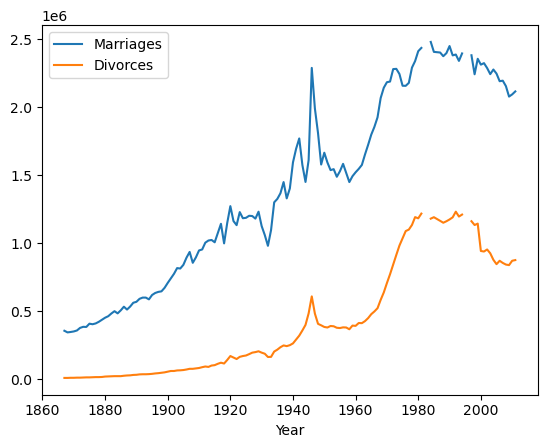

In [103]:
import matplotlib.pyplot as plt
plt.figure()
dataset.plot('Year',y=['Marriages','Divorces'])
plt.show()

### Question 7

Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

In [121]:
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
chart = data.loc[data.Year.isin([1900,1950,2000]),['Year','Marriages_per_1000','Divorces_per_1000']]
chart

,Year,Marriages_per_1000,Divorces_per_1000
33,1900,9.3,0.7
83,1950,11.0,2.5
133,2000,8.2,3.3


C:\Users\hpworld\AppData\Local\Temp\ipykernel_14320\3874692070.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chart[{'Marriages_per_1000','Divorces_per_1000'}].plot.bar()


([<matplotlib.axis.XTick at 0x261a6104100>,
 [Text(0, 0, '1900'), Text(1, 0, '1950'), Text(2, 0, '2000')])

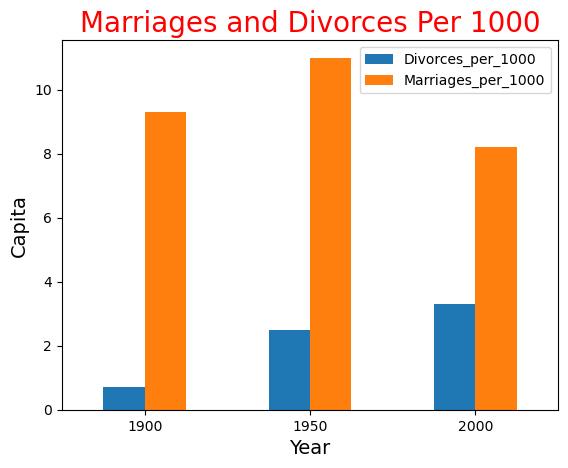

In [122]:
chart[{'Marriages_per_1000','Divorces_per_1000'}].plot.bar()
plt.title("Marriages and Divorces Per 1000", color = 'Red', fontsize = 20)
plt.xlabel('Year', color = 'Black', fontsize = 14)
plt.ylabel('Capita', color = 'Black', fontsize = 14)
positions = (0,1,2)
labels = ("1900", "1950", "2000")
plt.xticks(positions, labels, rotation = 0)

### Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!


Text(0, 0.5, 'Actor')

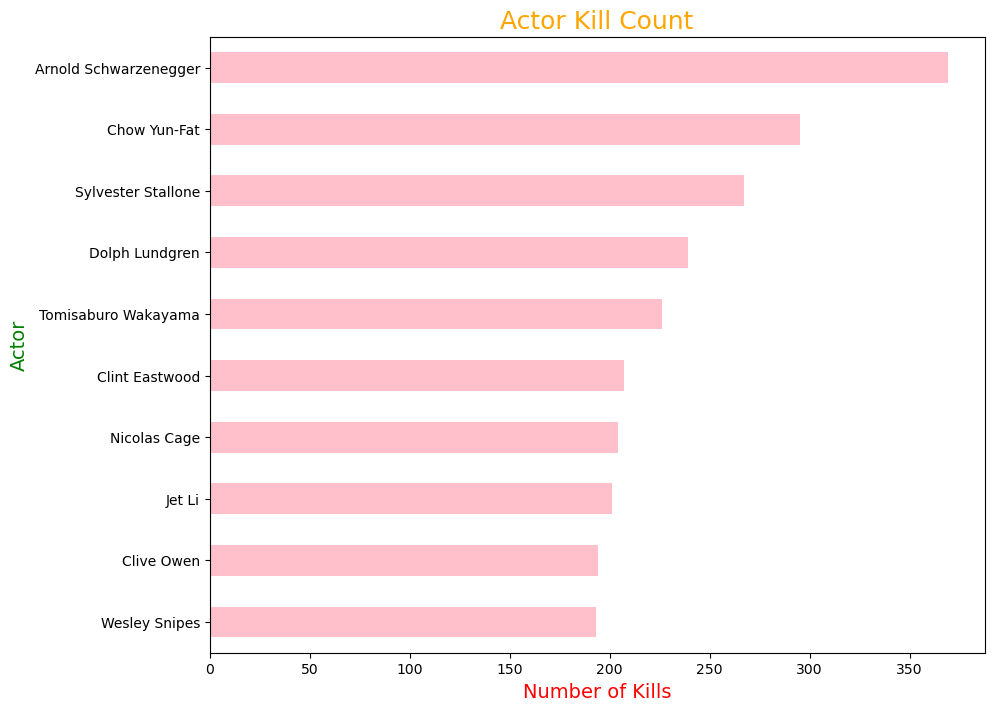

In [117]:
dataset = pd.read_csv('actor_kill_counts.csv')
chart=dataset.sort_values('Count', ascending = True)
chart.plot.barh(x='Actor', y='Count',legend=False,figsize=(10,8),color = 'Pink')
plt.title('Actor Kill Count', fontsize=18,color='Orange')
plt.xlabel('Number of Kills', fontsize = 14, color='Red')
plt.ylabel('Actor', fontsize = 14, color='GReen')

### Question 9

Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

Text(0.5, 1.0, 'Cause of death of Roman Emperors')

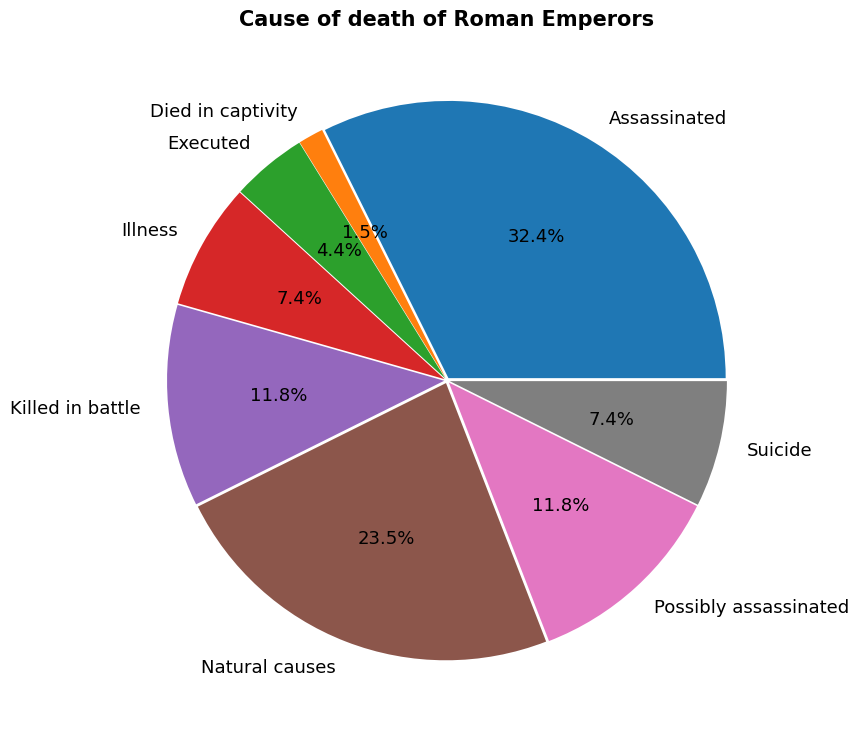

In [112]:
assassins =  pd.read_csv('roman-emperor-reigns.csv')
Emperor=assassins.groupby("Cause_of_Death")['Emperor'].count()
Emperor.plot.pie(autopct="%.1f%%", figsize = (9,9) , fontsize = 13, ylabel = '', explode=[0.01]*8)
plt.title("Cause of death of Roman Emperors", fontsize = 15, fontweight ='bold')

### Question 10

arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year

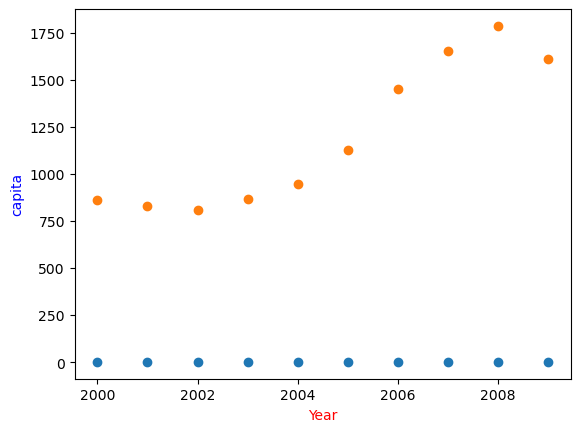

In [125]:
import pandas as pd
df = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")
import matplotlib.pyplot as plt
%matplotlib inline
x=[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009]
ArcadeRevenue = [1.196,1.176,1.269,1.240,1.307,1.435,1.601,1.654,1.803,1.734]
ComputerScience = [861,830,809,867,948,1129,1453,1656,1787,1611]
plt.scatter(x,ArcadeRevenue,label='ArcadeRevenue')
plt.scatter(x,ComputerScience,label='ComputerScience')
plt.xlabel("Year",color="Red")
plt.ylabel("capita",color="Blue")
plt.show()